## Initialization, data loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
%load_ext autoreload
%autoreload 2

sys.path.insert(0, '../src/')
from analyzer import ExperimentAnalyzer, plot_typography

In [2]:
plot_typography(usetex=True)
SAVE = False
FIGSIZE=(8,5)

In [3]:
START_IDX = 0
STOP_IDX = 5000
STEADY_STATE_START_IDX = 4000
STEADY_STATE_STOP_IDX = 85000

In [4]:
analyzer = ExperimentAnalyzer("core_10orbits_ecef", decimate_step=4, log_dir="log") # use decimate step of four to get seconds as the sampling time is 250ms

In [8]:
x = np.array([1, 2, 3])
x = x/ np.linalg.norm(x)


def noise_norm(x):
    xnoise = x + 1e-3 * np.random.randn(3)
    xnoise = xnoise / np.linalg.norm(xnoise)
    return xnoise

print(f"{np.rad2deg(1e-3)*3600}")

206.26480624709637


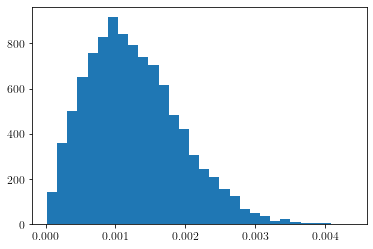

In [496]:
xhist = [np.arccos(x @ noise_norm(x)) for _ in range(10000) ]
_ = plt.hist(xhist, 30)

# Angular velocity

omega
omega_pred
\ensuremath{\left(\mathrm{\frac{rad}{s}}\right)}
\ensuremath{\left(\mathrm{\frac{rad}{s}}\right)}


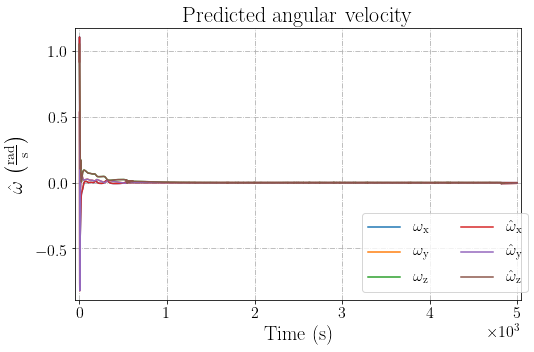

In [66]:
_ = analyzer.plot_joint(["omega", "omega_pred"],
                                 START_IDX, STOP_IDX, figsize=FIGSIZE, save=SAVE)

omega
Mean omega error=45.10730881631916 (std=20.274508103399963) in arcsec/s


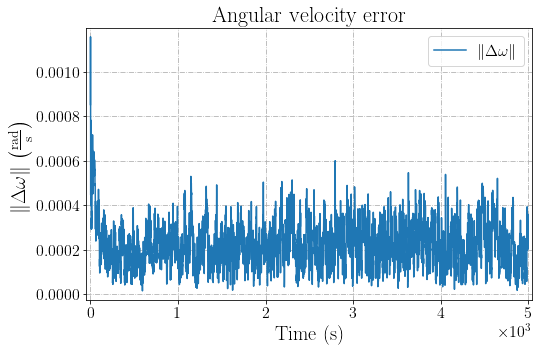

In [18]:
analyzer.plot_omega_error(START_IDX, STOP_IDX, figsize=FIGSIZE, save=SAVE)

# Orientation

### Comparing to target attitude

angles
angles_esoq
angles_st
esoq_q_norm
magnet_abc
sun_abc


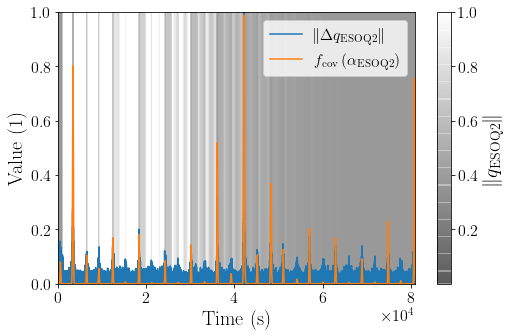

In [35]:
analyzer.plot_esoq_cov(STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

angles
angles_esoq
\ensuremath{\left(\mathrm{rad}\right)}
\ensuremath{\left(\mathrm{rad}\right)}


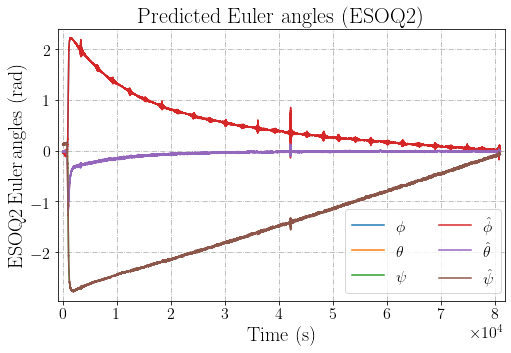

In [68]:
statistics = analyzer.plot_joint([ "angles", "angles_esoq"],
                                 STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

angles_target
angles


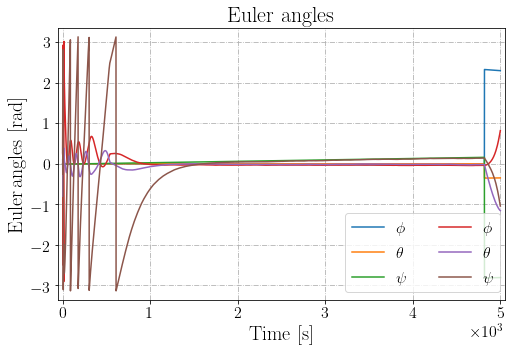

In [24]:
_ = analyzer.plot_joint(["angles_target", "angles"],
                                 START_IDX, STOP_IDX, figsize=FIGSIZE, save=SAVE)

### ACS error

acs_error_angles
Mean ACS error=84.03451618085512 (std=16.835213059045763) in arcseconds


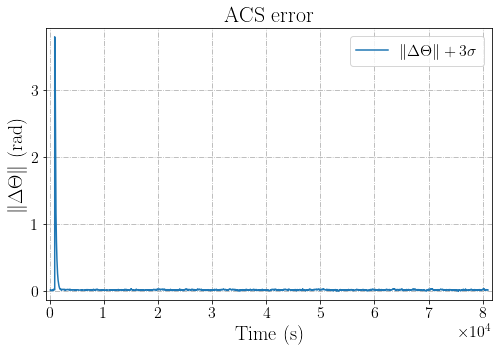

In [27]:
analyzer.plot_acs_error(STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

### Compare ground truth, proposed method and QuAdSRUKF

angles
angles_pred


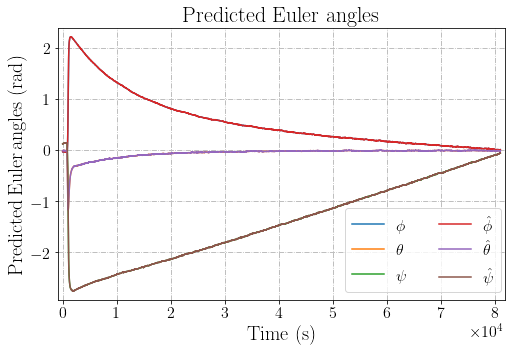

In [37]:
_ = analyzer.plot_joint(["angles", "angles_pred"],
                                 STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

angles
angles_pred
angles_ref_pred


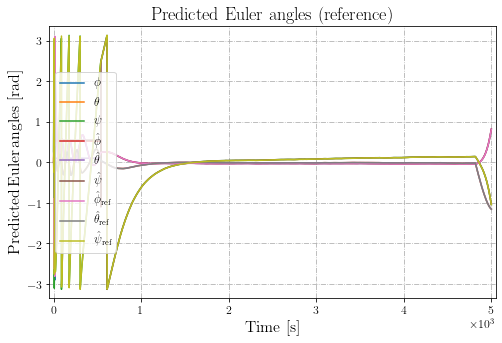

In [503]:
_ = analyzer.plot_joint(["angles", "angles_pred", "angles_ref_pred"],
                                 START_IDX, STOP_IDX, figsize=FIGSIZE, save=SAVE)

ads_error_angles
ads_ref_error_angles


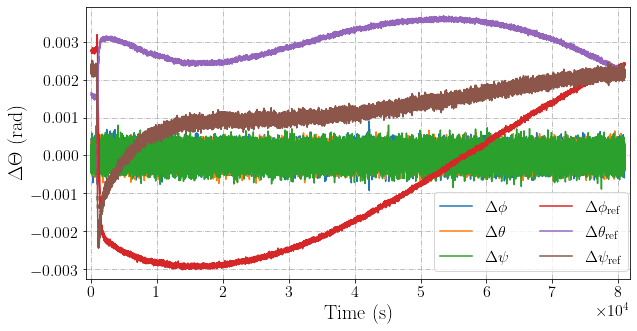

In [43]:
_ = analyzer.plot_joint(["ads_error_angles", "ads_ref_error_angles"],
                                 STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=(9.75,5), save=False)

ads_error_angles
ads_ref_error_angles
Mean errors: proposed=1.04386760793707 (std=0.4437598362865806), reference=14.08327448941693 (std=0.19901620235090448) in arcseconds


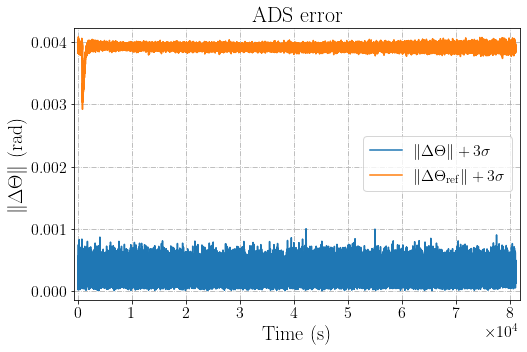

In [26]:
analyzer.plot_ads_error(STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

### Compare ground truth and prediction

angles
angles_pred


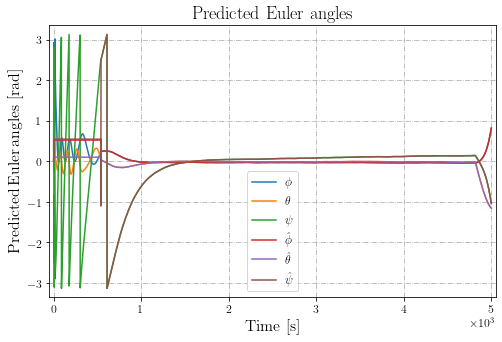

In [506]:
_ = analyzer.plot_joint(["angles", "angles_pred"],
                                 START_IDX, STOP_IDX, figsize=FIGSIZE, save=SAVE)

# Actuator signals

h_rw


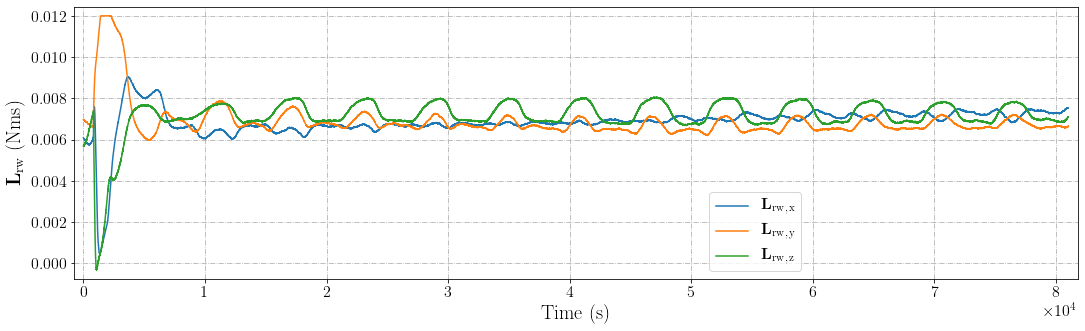

In [6]:
_ = analyzer.plot_separate(["h_rw"],
                                 STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=(18,5), save=True)

# Environment

### Magnetic field 

magnet_abc


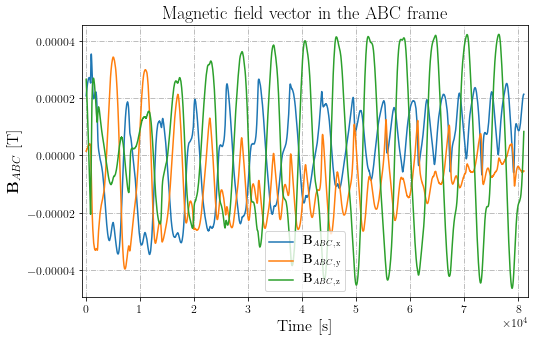

In [508]:
magnet_abc = analyzer.plot_separate(["magnet_abc"],STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

### Sun vector 

sun_abc


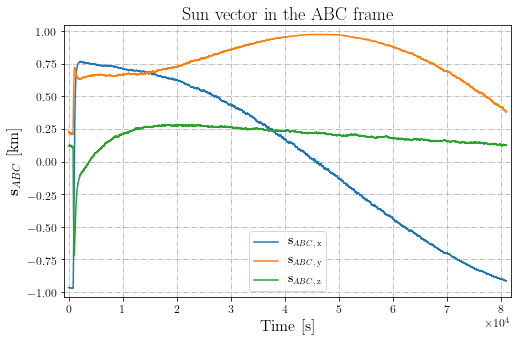

In [509]:
sun_abc = analyzer.plot_separate(["sun_abc"], STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

### Parallelism check between Sun vector and magnetic field vector 

sun_abc
magnet_abc


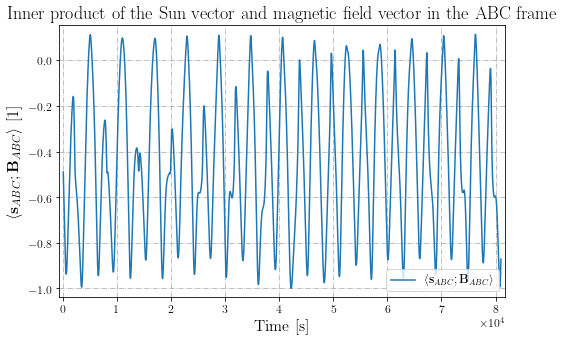

In [510]:
magnet_sun_inner_prod= analyzer.plot_magnet_sun_parallelism(STEADY_STATE_START_IDX, STEADY_STATE_STOP_IDX, figsize=FIGSIZE, save=SAVE)

### Disturbance torques

In [511]:
# do not replot
#dist_torques, _, _, _, _ = analyzer.plot(["dist_torques"], stop_idx=6000, joint_plot=False, plot_norm=False, figsize=(8,4), save=SAVE)